## Introduction 
    In this project our goal is to determine the best neighborhood in Pittsburgh from the perspective of family welfare. We define family welfare as being the safest place to raise a family with children. We chose this metric because we find that choosing a place to raise a family is the most important housing buying decision of someone’s life. Alternatives to his metric that we explored were general safety and cleanliness. These alternatives were rejected because we believed that considering family welfare would be considered in more important housing decisions. The data sets that make up our group metric are overall crime counts, traffic frequency, and percentage of housing with poor housing conditions.

In [1]:
import pandas as pd
import numpy as np
import geopandas
import os
%matplotlib inline
import matplotlib.pyplot as plt

## Dennison (Crime)
    Introduction: For this submetric, I'm going to focus on crime/overall safety of each neighborhood. While some alternatives were explored such as the Jail census or the number of arrests, I eventually settled on the "Blotter Data", or number of crime reports in each neighborhood. While this submetric may seem boring and unoriginal, when determining the quality of a neighborhood, crime is such an important factor that it can't be ignored. 

    The Metric: The metric I’m using is the number of observations of crime in each neighborhood. It will be measured using the blotter dataset from the WPRDC, and it contains crime reports in each neighborhood since 1/1/2016. I’m going to keep track of the observations of crime in each neighborhood and compare the frequencies; the neighborhood with the fewest number of observations will be deemed the safest. Once I had the data in this format, I converted it into a map using geopandas and the shapefile on the WPRDC website. Then, I made some customizations to the map which would best fit the purpose. 

    The Best Neighborhood: According to this crime metric only, the best neighborhood in Pittsburgh would be Mt. Oliver Boro, with only 86 reported crimes since 2016, which is the lowest observation count. It is the best neighborhood from a pure safety standpoint as crime is very infrequent. On the other hand, the neighborhood with the most crime observations would be the South Side Flats, with 15843 crimes since 2016; definitely way more dangerous than the previous. 

    Conclusion: The data driven determination of the “best neighborhood” is different from my personal favorite neighborhood in the Greater Pittsburgh Area, as it only takes into consideration the crime count. While crime is still considered, in contrast, my personal favorite neighborhood takes other factors into account such as location/convenience, traffic, and sanitation. However, Mt. Oliver Boro is still a solid choice, and the data driven result is still optimal.


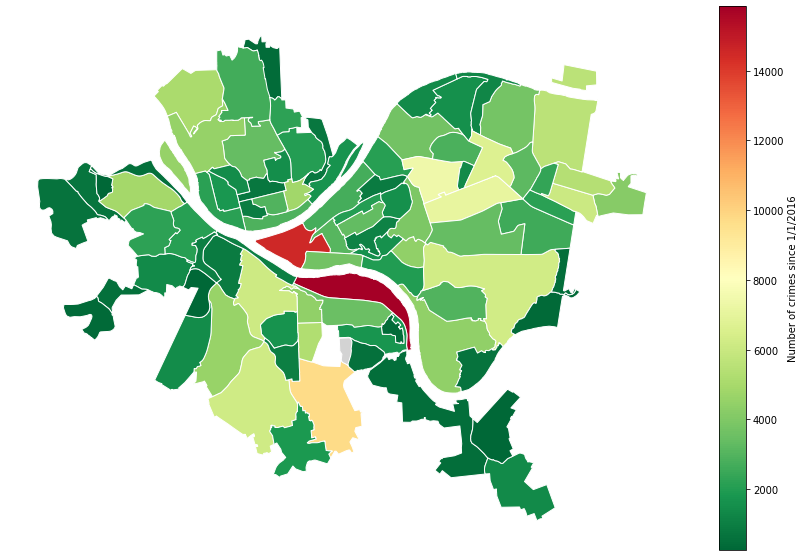

In [2]:
crime_data = pd.read_csv("data/Blotter.csv")
crime_data.head(5)
#data.pivot(columns="INCIDENTNEIGHBORHOOD", values="INCIDENTHIERARCHYDESC").head(10)

crime_data = crime_data.drop(columns=['PK','CCR','HIERARCHY','CLEAREDFLAG','INCIDENTTRACT','COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','OFFENSES','INCIDENTZONE'])
crime_data = crime_data.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood','INCIDENTHIERARCHYDESC':'Description'})
##data.loc[data['Description'] == 'THEFT']
crime_data[crime_data['Description'].str.contains('THEFT',na=False)]


crime_data.groupby("Neighborhood").count()

crime_data["Neighborhood"].value_counts()

crime_neighborhood_counts = crime_data['Neighborhood'].value_counts().sort_values(ascending=True) #this is a series
#crimedata = crimedata.rename('Neighborhood')
crime_neighborhood_counts = pd.DataFrame(crime_neighborhood_counts) #convert to dataframe to make it easier to read

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 

crime_map = neighborhoods.merge(crime_neighborhood_counts, how = 'left',left_on = 'hood',right_index = True)
crime_map = crime_map.plot(column = 'Neighborhood', cmap = 'RdYlGn_r', edgecolor = 'white', legend = True, 
               legend_kwds = {'label': "Number of crimes since 1/1/2016"}, figsize = (15,10),
                missing_kwds={"color": "lightgrey"},)
crime_map.set_axis_off()
# crime_map.explore()


#how to make map interactive like on the geopandas documentation?

In [3]:
crime_data.head(3)

,INCIDENTTIME,INCIDENTLOCATION,Neighborhood,Description,X,Y
0,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",North Shore,HARRASSMENT/THREAT/ATTEMPT/PHY,-80.012337,40.446263
1,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",Upper Lawrenceville,THEFT BY DECEPTION,-79.950295,40.482290
2,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,-80.000966,40.478651


In [4]:
crime_neighborhood_counts['crimeRank'] = crime_neighborhood_counts['Neighborhood'].rank(method = 'min', ascending = True)
crime_neighborhood_counts.sort_values(by=['crimeRank'], inplace=True)
crime_neighborhood_counts['hood'] = crime_neighborhood_counts.index
crime_neighborhood_counts.head()

,Neighborhood,crimeRank,hood
Mt. Oliver Boro,86,1.0,Mt. Oliver Boro
Mt. Oliver Neighborhood,117,2.0,Mt. Oliver Neighborhood
Outside County,189,3.0,Outside County
Troy Hill-Herrs Island,252,4.0,Troy Hill-Herrs Island
Outside State,260,5.0,Outside State


## Jackson (Traffic)
    Introduction: Our group is going to be analyzing what the best neighborhood in Pittsburgh is from an objective and practical standpoint. I will be focusing on traffic counts, this means what neighborhoods are more likely to be filled with bad traffic and amount of speeding done within those neighborhoods. The ability to see how much traffic is in each neighborhood can greatly help determine what areas of Pittsburgh you want to steer clear of.

    Metrics: The dataset used is Traffic Count data, this is a list of reported counts of high traffic and counts of speeding, and how much each count was speeding by. The data was started in 1/1/2019 and is updated to this day.

    Best Neighborhood: The best neighborhood according to my ranking would be South Side Flats, this is due to it's extremely low rated score of 115 counts of traffic each day, much ahead of the pack, with these low traffic rates it really shows how good it would be for family welfare, with less traffic that would lead to less chances for car crashes and other traffic related events.
    
    Conclusion: I believe South Side Flats is a pretty good overall neighborhood although it is not my personal top choice, this is due to South Side Flats having a horrendous crime rate. My personal favorite neighborhood in Pittsburgh is Oakland as it is all I really know being here on campus.

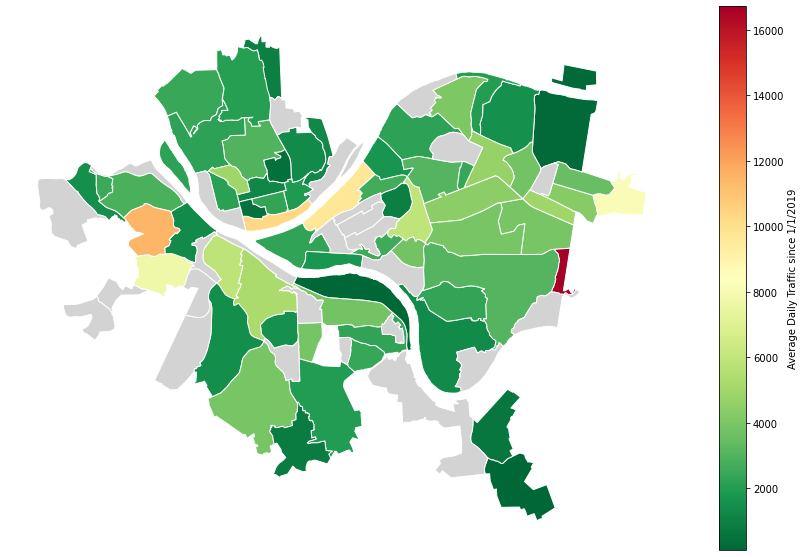

In [5]:
# Reading the dataset into the notebook, printing the first 10 lines of the dataset.
traffic_data = pd.read_csv("data/Traffic Count.csv", low_memory=False)
traffic_data.head(10)

num_traffic = traffic_data.groupby("neighborhood").mean()['average_daily_car_traffic']
num_traffic.sort_values(ascending=False)
num_traffic = pd.DataFrame(num_traffic)
num_traffic['hood'] = num_traffic.index
num_traffic.head()

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
trafficmap = neighborhoods.merge(num_traffic, how = 'left', left_on= 'hood',right_index = True)
trafficmap = trafficmap.plot(column = 'average_daily_car_traffic', cmap = 'RdYlGn_r', edgecolor = 'white', legend = True,
                            legend_kwds = {'label': "Average Daily Traffic since 1/1/2019"}, figsize = (15,10), 
                             missing_kwds={"color": "lightgrey"},)
trafficmap.set_axis_off()

In [6]:
traffic_data.head(3)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16


In [7]:
num_traffic['trafficRank'] = num_traffic['average_daily_car_traffic'].rank(method = 'min', ascending = True)
num_traffic.sort_values(by=['trafficRank'], inplace=True)
num_traffic['hood'] = num_traffic.index
num_traffic.head()

,average_daily_car_traffic,hood,trafficRank
neighborhood,,,
South Side Flats,115.0,South Side Flats,1.0
Lincoln Place,126.0,Lincoln Place,2.0
Lincoln-Lemington-Belmar,195.0,Lincoln-Lemington-Belmar,3.0
Fineview,419.0,Fineview,4.0
Allegheny West,477.0,Allegheny West,5.0


## Matthew (Poor Housing)

Introduction: For this submetric of our analysis, I will be focusing on the percentage of housing deemed to be in poor condition. For a house to be in poor condition, it must be deemed to be in “poor” or “unsound” condition. This includes houses with structural issues and major utility problems. In our analysis, the neighborhoods with a larger proportion of poor housing will be ranked lower on our lists, allowing us to know which neighborhoods have the best housing conditions.

Metrics: The dataset used is Allegheny County Poor Housing Conditions. This data includes a proportion of houses in poor condition corresponding to census tract numbers. These tract numbers can be mapped to each neighborhood. The dataset was created on December 1, 2016 and is updated every few months.

Best Neighborhood: Using this metric, the best neighborhood was deemed to be a tie across 59 different neighborhoods. While this conclusion may seem to be almost completely useless on the surface, it allows us to know which neighborhoods should be avoided due to a large number of alternatives.

Conclusion: In this 59 way tie, Squirrel Hill North is included. This aligns with my personal belief of the best neighborhood in Pittsburgh. This is my favorite neighborhood because it is part of the city, but is off to the side a bit so it is not as busy and takes the form of a more suburban style neighborhood.


(-80.10681367594599, -79.8543203064025, 40.35464264383522, 40.50793369806537)

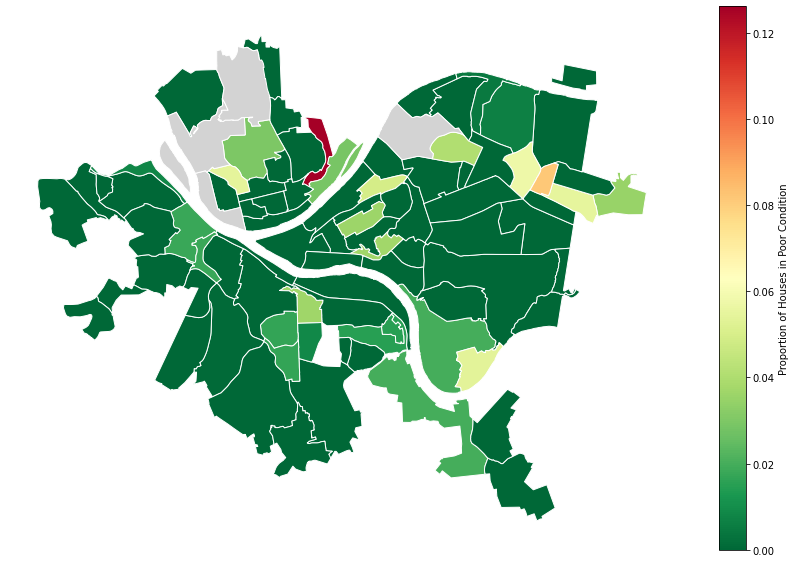

In [8]:
poor_housing_data = pd.read_csv("data/poorhousingconditions.csv")
poor_housing_data.head(5)

#TRACT is census the census tract number of each region
#PPoorCon is the percentage of housing deemed to be in poor condition

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

neighborhoods['tractce10'] = neighborhoods.tractce10.replace(' ',np.nan).astype(float)
neighborhoods['tractce10'] = pd.to_numeric(neighborhoods['tractce10'])

poor_housing_map = neighborhoods.merge(poor_housing_data, how='left', left_on='tractce10', right_on='TRACT')

poor_housing_map.plot(column='PPoorCon', # set the data to be used for coloring
               cmap='RdYlGn_r',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Proportion of Houses in Poor Condition"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

plt.axis('off')

In [9]:
poor_housing_data.head(3)

,TRACT,PPoorCon
0,431100,0.022593
1,432300,0.015898
2,563800,0.016079


In [10]:
poor_housing_map['conditionsRank'] = poor_housing_map['PPoorCon'].rank(method = 'min', ascending = True)
poor_housing_map.sort_values(by=['conditionsRank'], inplace=True)
poor_housing_map.filter(items = ['hood', 'PPoorCon', 'conditionsRank']).head()

,hood,PPoorCon,conditionsRank
0,Central Oakland,0.0,1.0
32,Carrick,0.0,1.0
33,Point Breeze,0.0,1.0
34,Duquesne Heights,0.0,1.0
35,Swisshelm Park,0.0,1.0


## Combined Ranking System

To combine our data into a single metric of overall welfare, we weighted and added together all of the ranks from each submetric. We decided that crime was the most important metric, seconded by traffic, followed by housing conditions. This order of importance was determined by the amount of danger represented by each metric. To show the determined order of importance quantitatively, we multiplied the ranks of crime by 3, traffic by 2, and housing conditions by 1 to add weight to each submetric. Finally, we added all of these weighted ranks together to form a rank score, then ranked the neighborhoods based on this score.

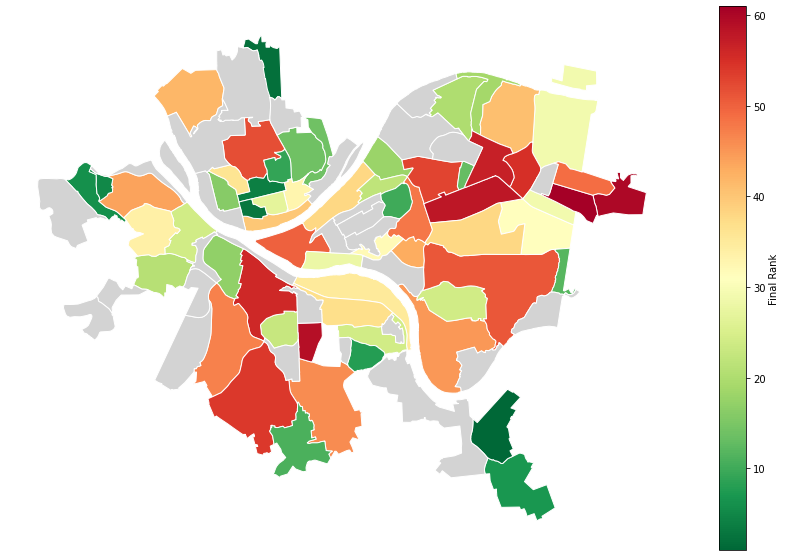

In [11]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

ranking_data = pd.DataFrame(neighborhoods['hood'])
ranking_data = pd.merge(ranking_data, poor_housing_map[['hood','conditionsRank']],left_on='hood', right_on='hood', how='left')
ranking_data = pd.merge(ranking_data, crime_neighborhood_counts[['hood','crimeRank']], left_on='hood', right_on='hood', how='left')
ranking_data = pd.merge(ranking_data, num_traffic[['hood','trafficRank']], left_on='hood', right_on='hood', how='left')

ranking_data['combined_weighted_rank_score'] = (ranking_data['conditionsRank'] * 1) + (ranking_data['trafficRank'] * 2) +(ranking_data['crimeRank'] * 3)

ranking_data['final_rank'] = ranking_data['combined_weighted_rank_score'].rank(method = 'min', ascending = True)
ranking_data.sort_values(by=['final_rank'], inplace = True )
ranking_data.head()

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
ranked_map = neighborhoods.merge(ranking_data, how = 'left', left_on= 'hood', right_on='hood')
ranked_map = ranked_map.plot(column = 'final_rank', cmap = 'RdYlGn_r', edgecolor = 'white', legend = True,
                            legend_kwds = {'label': "Final Rank"}, figsize = (15,10), 
                             missing_kwds={"color": "lightgrey"},)
ranked_map.set_axis_off()

In [12]:
ranking_data.head()

,hood,conditionsRank,crimeRank,trafficRank,combined_weighted_rank_score,final_rank
79,New Homestead,1.0,8.0,6.0,37.0,1.0
8,Summer Hill,1.0,13.0,8.0,56.0,2.0
54,Allegheny West,1.0,26.0,5.0,89.0,3.0
25,Central Northside,1.0,23.0,10.0,90.0,4.0
84,Chartiers City,1.0,7.0,35.0,92.0,5.0


## Best Neighborhood
We found the best neighborhood in Pittsburgh to be New Homestead. We believe this to be true for many reasons. To start, New Homestead is tied for the very best in terms of housing conditions, allowing for a families’ welfare to be in top shape. Still being up there in ranking in the other two metrics as well. New Homestead is the 6th lowest neighborhood for the amount of traffic that comes up, greatly decreasing the likelihood for car crashes and other dangerous events that can have an impact on a families’ welfare. Lastly with crime rates, it is the 8th lowest crime rate out of the neighborhoods in Pittsburgh, showing how safe your family will be.


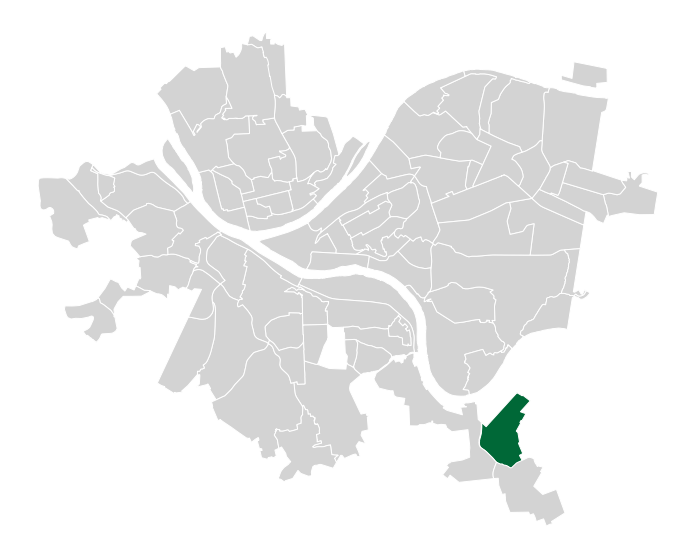

In [13]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
best_neighborhood = ranking_data.loc[ranking_data['final_rank'] == 1]
best_rank_map = neighborhoods.merge(best_neighborhood, how = 'left', left_on= 'hood', right_on='hood')
best_rank_map = best_rank_map.plot(column = 'final_rank', cmap = 'RdYlGn_r', edgecolor = 'white', legend = False,
                            legend_kwds = {'label': "Final Rank"}, figsize = (15,10), 
                             missing_kwds={"color": "lightgrey"},)
best_rank_map.set_axis_off()

In [14]:
best_neighborhood.head()

,hood,conditionsRank,crimeRank,trafficRank,combined_weighted_rank_score,final_rank
79,New Homestead,1.0,8.0,6.0,37.0,1.0


## Conclusion
Overall, the data-driven determination of the “best neighborhood” is different from our personal ones. By using metrics such as crime, traffic, and poor housing conditions and weighting them via rankings, we were able to come up with an overall metric, which is a “score” of the rankings. We decided that crime would be weighed the most, followed by traffic, then housing conditions. Thus, the lowest score would objectively be the best neighborhood. As a group, this project helped us gain experience working as a team using pandas, python, and github. Ultimately, it was a fun project which we found to be interesting and creative. 
